
# What makes a project exciting?

***The approach should include:***
● The data you used, how and why.
● What interesting insights did you uncover from the data you used?
● What kind of trends or potential correlations did you identify to improve our understanding of what an “exciting project” is?
● Story telling abilitiy is a must, and showing graphs is important.

***The output should be:***
● Jupyter Notebook: optionally you can place it in a private github repository.
● Presentation: to present your approach and the results you’ve achieved. 20 minute presentation tailored for a business audience.

**Note**: 6 datasests alaong with the necessary information about the features and the story behind datasets can be found here:
https://www.kaggle.com/c/kdd-cup-2014-predicting-excitement-at-donors-choose

In [1]:
import pandas as pd									# data manipulation
import matplotlib.pyplot as plt						# graphs
import seaborn as sns								# graphs
import numpy as np									# graphs
from scipy.stats import norm						# statistics
from sklearn.preprocessing import StandardScaler	# statistics
from scipy import stats								# statistics
from math import *									# advance calculation
from matplotlib import cm							# graphs
import sys											# system functions
import warnings										# indicating warnings
warnings.filterwarnings('ignore')					# ignore by default
from matplotlib.ticker import LinearLocator			# graphs
pd.set_option('display.max_columns', 100)			# show all columns
pd.set_option('display.max_rows', None)				# show all rows
np.set_printoptions(threshold=sys.maxsize)			# show arrays full
pd.set_option("display.max_colwidth", 40)			# show a complete text in a cell
pd.set_option('display.precision',5)				# precision decimals pd
np.set_printoptions(precision=3)					# precision decimals np
from xlsxwriter.workbook import Workbook			# CSV writing
import csv											# CSV writing
import xgboost as xgb								# prediction
import pickle										# prediction
import sklearn										# mutual information
import statsmodels.api as sm						# coefficient
from sklearn.ensemble import RandomForestClassifier	# random forest
from sklearn import linear_model					# linear regression
import pymysql										# MySql connection
import datetime										# time conversions
import random										# randomchoice
import math as math									# maths
import statistics									# statistics
import glob											# paths and files management
import matplotlib.image as mpimg					# matplot image
from functools import reduce						# reduce

In [2]:
# Read datasets and sort them by projectid:
# After Resources and sampleSubmission have been gone through data profiling, I decided not to open them to avoid 
# my system being crashing by too much data.
# Note that data profiling which can be found in the following is only an example of the whole procedure.
# I used describe, dtypes, sample, head/tail, nunique, value_counts, and some maths function to realize what we're gonna do next
# About Resource dataset: even though there must be a correlation between some features of that and is_exciting, we do not
# consider it for analyzing since the resources has occured after the indication of project excitement. Besides, the 
# correlation is not necessarily the causation!

dfd = pd.read_csv('donations.csv')
dfd = dfd.sort_values(['projectid'], ascending=[True])
dfd = dfd.reset_index(drop=True)

dfe = pd.read_csv('essays.csv')
dfe = dfe.sort_values(['projectid'], ascending=[True])
dfe = dfe.reset_index(drop=True)

dfo = pd.read_csv('outcomes.csv')
dfo = dfo.sort_values(['projectid'], ascending=[True])
dfo = dfo.reset_index(drop=True)

dfp = pd.read_csv('projects.csv')
dfp = dfp.sort_values(['projectid'], ascending=[True])
dfp = dfp.reset_index(drop=True)

In [16]:
dfo.head(1)

# There are five criteria accroding to Kaggle that makes a project exciting, only two of which can be extracted from other
# datasets: 1- fully funded: by comparing the initial cost of project and donated money as well as 2- at_least_1_green_donation 
# from donation datasests with the defination specified in Kaggle. The rest should be inferred and in fact predicted as a 
# data science project. But, we just want to analyze those records that we already know their exciting status.So, we 'left merge' 
# output dataset with other datasets based on projectid.

,projectid,is_exciting,at_least_1_teacher_referred_donor,fully_funded,at_least_1_green_donation,great_chat,three_or_more_non_teacher_referred_donors,one_non_teacher_referred_donor_giving_100_plus,donation_from_thoughtful_donor,great_messages_proportion,teacher_referred_count,non_teacher_referred_count
0,00001ccc0e81598c4bd86bacb94d7acb,f,f,t,t,f,t,t,f,33.0,0.0,3.0


In [14]:
dfd.head(3)

,donationid,projectid,donor_acctid,donor_city,donor_state,donor_zip,is_teacher_acct,donation_timestamp,donation_to_project,donation_optional_support,donation_total,dollar_amount,donation_included_optional_support,payment_method,payment_included_acct_credit,payment_included_campaign_gift_card,payment_included_web_purchased_gift_card,payment_was_promo_matched,via_giving_page,for_honoree,donation_message
0,1f22e76fa76c2c9e8d90818b7c275845,00001ccc0e81598c4bd86bacb94d7acb,1d5ae2920a125a3ba0ab8dbb4a281052,NaN,,NaN,f,2013-05-06 15:12:22.77,4.25,0.75,5.00,under_10,t,promo_code_match,f,f,f,f,f,f,Matching donation provided by Donors...
1,014654dc6c8c42d9b95727364c680f64,00001ccc0e81598c4bd86bacb94d7acb,9b49b8bebd5b2d35d4befba8f1473560,New York,NY,10014.0,f,2013-05-23 12:19:59.516,1265.32,223.29,1488.61,100_and_up,t,no_cash_received,t,f,f,f,f,f,The LilySarahGraceFund is funding th...
2,6852f37d0f4cb3e3707ac57f07576a3b,00001ccc0e81598c4bd86bacb94d7acb,96963218e74e10c3764a5cfb153e6fea,Chicago,IL,60617.0,t,2013-05-06 15:12:21.387,4.25,0.75,5.00,under_10,t,creditcard,f,f,f,t,f,f,I gave because my students are AWESO...


In [17]:
dfp.head(1)

,projectid,teacher_acctid,schoolid,school_ncesid,school_latitude,school_longitude,school_city,school_state,school_zip,school_metro,school_district,school_county,school_charter,school_magnet,school_year_round,school_nlns,school_kipp,school_charter_ready_promise,teacher_prefix,teacher_teach_for_america,teacher_ny_teaching_fellow,primary_focus_subject,primary_focus_area,secondary_focus_subject,secondary_focus_area,resource_type,poverty_level,grade_level,fulfillment_labor_materials,total_price_excluding_optional_support,total_price_including_optional_support,students_reached,eligible_double_your_impact_match,eligible_almost_home_match,date_posted
0,00001ccc0e81598c4bd86bacb94d7acb,96963218e74e10c3764a5cfb153e6fea,9f3f9f2c2da7edda5648ccd10554ed8c,1.70993e+11,41.80765,-87.67326,Chicago,IL,60609.0,urban,Pershing Elem Network,Cook,f,f,f,f,f,f,Mrs.,f,f,Mathematics,Math & Science,Visual Arts,Music & The Arts,Supplies,highest poverty,Grades PreK-2,30.0,1273.82,1498.61,31.0,f,f,2013-04-14


In [64]:
dfo['projectid'].nunique()

619326

In [13]:
dfd['projectid'].nunique()

525042

In [3]:
# We choose only 'is_teacher_acct' from donation datasets. The rest are either included in outcome dataset or doesn't have
# enough data. For calculating the number of teachers we can't use a function to count and write them in a new df because it
# takes ages. Instead, I will use the following trick.

dfd = dfd[['projectid','is_teacher_acct']]
dfd.drop(dfd.loc[dfd['is_teacher_acct'] == 'f'].index, inplace=True)
dfcount = dfd['projectid'].value_counts().rename_axis('projectid').reset_index(name='teachers_acct')
dfd = dfcount.sort_values(['projectid'], ascending=[True])

# Now, we have the sum of teachers participated in each project. We will take only this feature from donation dataset
# Note that I later calculated people participated minus teachers count in Calculation field in Tableau

In [27]:
# We can use content analysis(later) for essay dataset to see if the title and description makes the project more excited or not

dfe.drop(columns=['teacher_acctid'], inplace=True)

In [4]:
# Project dataset is the most important one as the more related data appears in it.
# We'll get rid of some features and add corporate impact as the sum of two following cols to measure the impact of corporations

dfp.drop(columns=['teacher_acctid','schoolid','school_ncesid','school_district','school_county','secondary_focus_subject',
                  'secondary_focus_area','fulfillment_labor_materials','total_price_excluding_optional_support'], inplace=True)
dfp.replace({'eligible_double_your_impact_match': {'f': '0','t': '1'}}, inplace=True, regex=True)
dfp.replace({'eligible_almost_home_match': {'f': '0','t': '1'}}, inplace=True, regex=True)
dfp['eligible_double_your_impact_match'] = dfp['eligible_double_your_impact_match'].astype(int)
dfp['eligible_almost_home_match'] = dfp['eligible_almost_home_match'].astype(int)
dfp['corporate_impact'] = dfp['eligible_double_your_impact_match'] + dfp['eligible_almost_home_match']
dfp.drop(columns=['eligible_double_your_impact_match','eligible_almost_home_match'], inplace=True)

# Replacing genders

dfp.replace({'teacher_prefix': {'Mrs.': 'Female','Ms.': 'Female','Mr.': 'Male','Dr.': np.nan,'Mr. & Mrs.': np.nan}}, inplace=True, regex=True)
dfp.replace({'teacher_prefix': {'Male & Female': np.nan}}, inplace=True, regex=True)

In [5]:
# Let's merge!
# we merge based on dataset 'output' because we want to only consider projectids with exciting feature result

dfname = [dfo, dfp, dfe, dfd]
df = reduce(lambda left,right: pd.merge(left,right,on='projectid', how='left'), dfname)
df.at[df.loc[df['teachers_acct'].isnull()].index,'teachers_acct'] = 0
df['teachers_acct'] = df['teachers_acct'].astype(int)

# Now let's replace f by 0 and t by 1 so that we can use correlation command as well as avergae and sum
listcol = df.columns.drop(['projectid','great_messages_proportion','teacher_referred_count','non_teacher_referred_count',
'school_latitude','school_longitude','school_city','school_state','school_zip','school_metro','teacher_prefix',
'primary_focus_subject','primary_focus_area','resource_type','poverty_level','grade_level',
'total_price_including_optional_support','students_reached','date_posted','corporate_impact','title','short_description',
                           'need_statement','essay','teachers_acct'])
for column in listcol:
    df[column].replace({'f':0,'t':1}, regex=True, inplace=True)

df.head(3)
# Ok, now we have a desent dataset! So, let's start over!

,projectid,is_exciting,at_least_1_teacher_referred_donor,fully_funded,at_least_1_green_donation,great_chat,three_or_more_non_teacher_referred_donors,one_non_teacher_referred_donor_giving_100_plus,donation_from_thoughtful_donor,great_messages_proportion,teacher_referred_count,non_teacher_referred_count,school_latitude,school_longitude,school_city,school_state,school_zip,school_metro,school_charter,school_magnet,school_year_round,school_nlns,school_kipp,school_charter_ready_promise,teacher_prefix,teacher_teach_for_america,teacher_ny_teaching_fellow,primary_focus_subject,primary_focus_area,resource_type,poverty_level,grade_level,total_price_including_optional_support,students_reached,date_posted,corporate_impact,teacher_acctid,title,short_description,need_statement,essay,teachers_acct
0,00001ccc0e81598c4bd86bacb94d7acb,0,0.0,1,1.0,0,1.0,1.0,0.0,33.0,0.0,3.0,41.80765,-87.67326,Chicago,IL,60609.0,urban,0,0,0,0,0,0,Female,0,0,Mathematics,Math & Science,Supplies,highest poverty,Grades PreK-2,1498.61,31.0,2013-04-14,0,0,Math With A Pinch of ART!,My students would love the opportuni...,"My students need math counters, geob...",My students would love the opportuni...,1
1,00002bff514104264a6b798356fdd893,0,0.0,1,1.0,0,0.0,1.0,0.0,50.0,0.0,2.0,35.20345,-118.84096,Arvin,CA,93203.0,NaN,0,0,0,0,0,0,Female,0,0,Literacy,Literacy & Language,Supplies,highest poverty,Grades PreK-2,561.55,20.0,2010-09-08,1,0,Speedy Shark Reading Club,My students need more incentives to ...,My students need word building cente...,My students need more incentives to ...,0
2,00002d691c05c51a5fdfbb2baef0ba25,0,0.0,0,0.0,1,1.0,0.0,0.0,100.0,0.0,5.0,34.13800,-118.06279,Arcadia,CA,91007.0,urban,0,0,0,0,0,0,Male,0,0,Literature & Writing,Literacy & Language,Books,moderate poverty,Grades 3-5,1049.78,250.0,2010-12-10,0,0,You Go Read at HRS,"My students need high quality books,...","My students need high quality books,...",Our students need the challenge to r...,1


In [2]:
# To avoid my system being crashed, I saved the main file and directly open it from now on.

# df.to_csv('df.csv', index=None)
df = pd.read_csv('df.csv')

In [9]:
# Show null values and duplicates
def nulldup(df):
    total = df.isnull().sum().sort_values(ascending=False)
    percent = round((df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)*100, 3)
    missing_data = pd.concat([total, percent], axis=1, keys=['NullTotal', 'Null%'])
    for dup in missing_data.index:
        missing_data.at[dup,'DupTotal'] = df.duplicated(subset=[dup]).sum()
        missing_data.at[dup,'Dup%'] = round((df.duplicated(subset=[dup]).sum())/df.shape[0]*100,3)
    display(missing_data.head(20))

nulldup(df)

,NullTotal,Null%,DupTotal,Dup%
great_messages_proportion,179839,29.038,619224.0,99.984
teacher_referred_count,94398,15.242,619244.0,99.987
donation_from_thoughtful_donor,94398,15.242,619323.0,100.000
at_least_1_teacher_referred_donor,94398,15.242,619323.0,100.000
at_least_1_green_donation,94398,15.242,619323.0,100.000
one_non_teacher_referred_donor_giving_100_plus,94398,15.242,619323.0,100.000
three_or_more_non_teacher_referred_donors,94398,15.242,619323.0,100.000
non_teacher_referred_count,94398,15.242,619191.0,99.978
school_metro,75488,12.189,619322.0,99.999
need_statement,1472,0.238,22712.0,3.667


In [3]:
print('The number of null values asscoiated directly with is_exciting:',df.loc[(df['great_messages_proportion'].isnull()) | (df['at_least_1_teacher_referred_donor'].isnull())]['is_exciting'].value_counts().sum())

# Can not existing data be interpreted as not exiciting project? No.
# So, let's drop it to have more acurate results in the end.
      
df.drop(df.loc[(df['great_messages_proportion'].isnull()) | (df['at_least_1_teacher_referred_donor'].isnull())].index, inplace=True)

# We don't care about the rest of null values

The number of null values asscoiated directly with is_exciting: 179871


In [22]:
# I will start with content analysis before profiling/cleansing because the file is too heavy and my computer gets crashed!
# I will drop the content-related features after the following analysis
# Content Analysis: title where is_exciting=1 (Help, Need, Reading, Learning, Classroom)

def sm(col_series):
    result_df = col_series.to_frame()
    options = []
    for idx, value  in col_series[col_series.notnull()].iteritems():
        for option in value.split(' '):
            if not option in result_df.columns:
                options.append(option)
                result_df[option] = False
            result_df.at[idx, option] = True
    return result_df[options]
dfresult = sm(df.loc[df['is_exciting'] == 1]['title'].sample(1000))
dfresult.head(100)

,Forensic,Photos,We,Love,to,Read!,,Capturing,Learning,In,Action,-,The,Flip,Camera,Life,is,a,Highway---,Reading,the,Key!!,IPad,Minis,For,First,Graders,Displaced,By,Sandy!,Read,Around,City,Practicing,Social,Skills,Through,Media,Readers,Becoming,eReaders:,Remodeling,Classroom,Library,Book,"Nooks""",A,Cozy,Environment,Aspiring,...,Cinderella,(Phase,One),Finest!,Mobile,Demos,Light:,Glazed,Over,D.E.A.R.-Drop,Everything,Read!!!,Parents,ASL,Rocket,Outside:,Mini,Many!,Couldn't,Wand?,Interact,Refresh,Reorganize,2014,Crave,UnGlazed,Pots,Rural,Achieving,Calculations,Singing,Tune,?,2013-14!,Never,Enough,Space!,Heartbeat,Wisely,Numbers:,Ways,Connect,Step,Century:,Interventions,Pad!,Starving,Artists!,Fear,Shakespeare!
349203,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
90247,False,False,True,True,True,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
423858,False,False,False,False,False,False,False,True,True,True,True,True,True,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
206466,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,True,True,True,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
232219,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,True,True,True,True,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
335355,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,True,True,False,False,False,False,False,False,False,False,False,False,Fa

In [14]:
# I will start with content analysis before profiling/cleansing because the file is too heavy and my computer gets crashed!
# I will drop the content-related features after the following analysis
# Content Analysis: title where is_exciting=1 

def sm(col_series):
    result_df = col_series.to_frame()
    options = []
    for idx, value  in col_series[col_series.notnull()].iteritems():
        for option in value.split(' '):
            if not option in result_df.columns:
                options.append(option)
                result_df[option] = False
            result_df.at[idx, option] = True
    return result_df[options]
dfresult = sm(df.loc[df['is_exciting'] == 1]['title'].sample(30000))
dfresult.sum().sort_values(ascending=False)[:100]

for             3501
to              2760
the             2668
                2231
and             2010
a               1933
The             1865
Our             1781
Help            1728
Need            1705
A               1616
Reading         1537
in              1454
Learning        1447
Classroom       1373
For             1366
We              1274
of              1257
Students        1230
Books           1164
with            1100
To              1038
Technology       967
Math             932
Readers          891
Us               828
With             793
My               791
Science          727
In               685
Through          678
Read             637
Library          625
Grade            587
New              580
Class            569
And              537
Literacy         526
-                521
School           518
Love             500
You              492
Supplies         491
is               483
Needs            478
Listening        476
Learn            472
I            

In [15]:
# Content Analysis: title where is_exciting=0 (Reading, Learning, Help, Students, Need)

def sm(col_series):
    result_df = col_series.to_frame()
    options = []
    for idx, value  in col_series[col_series.notnull()].iteritems():
        for option in value.split(' '):
            if not option in result_df.columns:
                options.append(option)
                result_df[option] = False
            result_df.at[idx, option] = True
    return result_df[options]
dfresult = sm(df.loc[df['is_exciting'] == 0]['title'].sample(30000))
dfresult.sum().sort_values(ascending=False)[:100]

for             3052
the             2610
to              2536
                2091
and             2037
The             1756
a               1658
A               1599
Our             1577
Reading         1536
Learning        1508
in              1496
Help            1439
For             1377
Need            1318
of              1231
We              1213
Students        1158
To              1119
Classroom       1100
with            1065
Math            1051
Technology      1034
Books            982
Science          825
With             810
My               787
Us               692
Readers          670
In               656
Through          633
Read             615
I                602
And              553
Can              515
Literacy         509
You              503
is               501
World            497
Grade            492
Learn            474
School           465
Art              447
Get              442
Love             437
Let's            435
Listening        431
New          

In [16]:
# Content Analysis: short_description where is_exciting=1 (students, need, school, classroom, reading)

def sm(col_series):
    result_df = col_series.to_frame()
    options = []
    for idx, value  in col_series[col_series.notnull()].iteritems():
        for option in value.split(' '):
            if not option in result_df.columns:
                options.append(option)
                result_df[option] = False
            result_df.at[idx, option] = True
    return result_df[options]
dfresult = sm(df.loc[df['is_exciting'] == 1]['short_description'].sample(30000))
dfresult.sum().sort_values(ascending=False)[:100]

to            23631
and           19671
the           19342
students      18846
a             17658
of            15170
in            13860
my            10938
are           10509
is             9989
My             9348
I              9310
that           9081
have           8581
for            7837
you            7292
with           7212
their          6456
our            6255
will           6208
be             5949
               5437
they           5356
need           4855
school         4644
on             4581
The            4200
we             4085
it             4072
can            4071
not            3909
them           3743
an             3738
classroom      3530
We             3373
at             3279
reading        3225
as             3165
but            3141
help           3048
books          3039
this           2996
read           2961
Do             2938
remember       2856
your           2834
all            2785
learn          2774
learning       2773
or             2720


In [17]:
# Content Analysis: short_description where is_exciting=0 (school, classroom, books, learning, reading)

def sm(col_series):
    result_df = col_series.to_frame()
    options = []
    for idx, value  in col_series[col_series.notnull()].iteritems():
        for option in value.split(' '):
            if not option in result_df.columns:
                options.append(option)
                result_df[option] = False
            result_df.at[idx, option] = True
    return result_df[options]
dfresult = sm(df.loc[df['is_exciting'] == 0]['short_description'].sample(30000))
dfresult.sum().sort_values(ascending=False)[:100]

to            24203
and           20420
the           19792
students      19502
a             17638
of            15182
in            14255
my            10949
are           10449
I              9822
is             9597
that           9480
have           8996
My             8764
for            8483
will           8052
with           7493
               7371
their          7225
be             6686
our            6202
they           5858
you            5814
need           5806
on             4783
The            4780
can            4446
them           4312
school         4262
we             4082
it             4073
help           3944
not            3868
an             3713
We             3631
as             3451
would          3425
classroom      3330
at             3310
reading        3163
this           3087
books          3056
learning       3021
learn          2894
but            2838
all            2773
able           2702
from           2689
do             2622
read           2621


In [18]:
# Content Analysis: need_statement where is_exciting=1 (books, reading, classroom, learning, help)

def sm(col_series):
    result_df = col_series.to_frame()
    options = []
    for idx, value  in col_series[col_series.notnull()].iteritems():
        for option in value.split(' '):
            if not option in result_df.columns:
                options.append(option)
                result_df[option] = False
            result_df.at[idx, option] = True
    return result_df[options]
dfresult = sm(df.loc[df['is_exciting'] == 1]['need_statement'].sample(30000))
dfresult.sum().sort_values(ascending=False)[:100]

My             29990
students       29986
need           29934
to             21253
and            20322
a              12853
                9769
the             8851
of              8662
their           7430
for             7230
in              7156
our             4423
books           4348
that            3738
them            3598
help            3436
with            3417
reading         3274
an              3082
they            2853
as              2833
can             2531
on              2418
classroom       2393
new             2228
will            2221
so              2183
learning        2034
use             1755
math            1691
during          1661
copies          1654
learn           1624
read            1586
be              1584
2               1509
class           1503
have            1501
are             1461
materials       1427
school          1409
order           1390
such            1387
sets            1380
book            1280
set             1266
we           

In [19]:
# Content Analysis: need_statement where is_exciting=0 (books, including, help, reading, cost)

def sm(col_series):
    result_df = col_series.to_frame()
    options = []
    for idx, value  in col_series[col_series.notnull()].iteritems():
        for option in value.split(' '):
            if not option in result_df.columns:
                options.append(option)
                result_df[option] = False
            result_df.at[idx, option] = True
    return result_df[options]
dfresult = sm(df.loc[df['is_exciting'] == 0]['need_statement'].sample(30000))
dfresult.sum().sort_values(ascending=False)[:100]

My            29926
students      29804
need          29749
and           19863
to            18508
a             12724
               9371
of             8304
the            8122
for            6434
in             6393
their          5956
our            3634
books          3612
with           3344
that           3168
them           3032
an             3010
help           2993
reading        2656
as             2540
they           2345
on             2127
classroom      2040
can            1980
learning       1804
will           1789
math           1764
2              1762
so             1752
copies         1641
use            1636
new            1622
be             1468
learn          1443
during         1369
set            1348
such           1343
sets           1296
materials      1294
have           1238
are            1197
read           1196
book           1176
order          1164
class          1148
including      1147
school         1072
science        1032
about           995


In [20]:
# Content Analysis: essay where is_exciting=1 (help, need, learning, classroom, able)

def sm(col_series):
    result_df = col_series.to_frame()
    options = []
    for idx, value  in col_series[col_series.notnull()].iteritems():
        for option in value.split(' '):
            if not option in result_df.columns:
                options.append(option)
                result_df[option] = False
            result_df.at[idx, option] = True
    return result_df[options]
dfresult = sm(df.loc[df['is_exciting'] == 1]['essay'].sample(3000))
dfresult.sum().sort_values(ascending=False)[:100]

to            2999
and           2997
the           2989
              2984
a             2983
of            2974
students      2962
in            2962
are           2877
will          2788
for           2764
is            2754
have          2727
their         2708
that          2699
with          2633
be            2624
my            2588
they          2571
school        2379
I             2307
them          2236
on            2194
our           2152
can           2072
as            1926
help          1907
this          1875
They          1837
from          1831
not           1817
an            1795
The           1790
at            1758
we            1751
\r\n\r\nMy    1703
need          1694
My            1693
it            1682
all           1618
but           1541
learning      1530
learn         1518
more          1509
or            1505
classroom     1463
these         1463
able          1453
you           1450
so            1438
many          1410
do            1322
make        

In [21]:
# Content Analysis: essay where is_exciting=0 (help, need, learning, classroom, able)

def sm(col_series):
    result_df = col_series.to_frame()
    options = []
    for idx, value  in col_series[col_series.notnull()].iteritems():
        for option in value.split(' '):
            if not option in result_df.columns:
                options.append(option)
                result_df[option] = False
            result_df.at[idx, option] = True
    return result_df[options]
dfresult = sm(df.loc[df['is_exciting'] == 0]['essay'].sample(3000))
dfresult.sum().sort_values(ascending=False)[:100]

# As a rule of thumb, the words implying a need or igniting emotions on readers tend to work more effectively than the rest.

to            3000
and           2991
a             2981
the           2979
of            2960
students      2954
in            2940
              2890
are           2853
will          2728
for           2709
have          2676
is            2659
their         2638
that          2620
be            2556
with          2533
my            2522
they          2460
I             2324
school        2319
them          2103
our           2087
on            2083
help          1965
can           1950
as            1863
this          1785
The           1755
an            1747
at            1705
from          1704
not           1690
it            1661
They          1658
need          1636
we            1635
My            1554
learning      1529
all           1504
more          1483
\r\n\r\nMy    1444
able          1440
these         1409
learn         1408
but           1405
or            1374
so            1374
you           1359
classroom     1357
make          1305
by            1289
many        

In [41]:
# Dropping content-related features to make the file easier to be analyzed

df.drop(columns=['title','short_description','need_statement','essay'], inplace=True)
# df.to_csv('Report.csv', index=None)

In [31]:
# reading from hard, converting object time to dataframe, correcting typos, creating year to help visualizing easier, changing
# is_exciting to 100 scale to make it more unserstandable, droping the observations with zero total_price, dropping year 2006

df = pd.read_csv('Report.csv')
df['date_posted'] = pd.to_datetime(df['date_posted'])
df.at[df.loc[df['school_state'] == 'La'].index,'school_state'] = 'LA'
df['year'] = df['date_posted'].dt.year
df['is_exciting'] = df['is_exciting']*100
df.drop(df.loc[df['total_price_including_optional_support'] == 0].index, inplace=True)
df.drop(df.loc[df['year'] == 2006].index, inplace=True)
df.head(5)

,projectid,is_exciting,at_least_1_teacher_referred_donor,fully_funded,at_least_1_green_donation,great_chat,three_or_more_non_teacher_referred_donors,one_non_teacher_referred_donor_giving_100_plus,donation_from_thoughtful_donor,great_messages_proportion,teacher_referred_count,non_teacher_referred_count,school_latitude,school_longitude,school_city,school_state,school_zip,school_metro,school_charter,school_magnet,school_year_round,school_nlns,school_kipp,school_charter_ready_promise,teacher_prefix,teacher_teach_for_america,teacher_ny_teaching_fellow,primary_focus_subject,primary_focus_area,resource_type,poverty_level,grade_level,total_price_including_optional_support,students_reached,date_posted,corporate_impact,teachers_acct,year
0,00001ccc0e81598c4bd86bacb94d7acb,0,0.0,1,1.0,0,1.0,1.0,0.0,33.0,0.0,3.0,41.80765,-87.67326,Chicago,IL,60609.0,urban,0,0,0,0,0,0,Female,0,0,Mathematics,Math & Science,Supplies,highest poverty,Grades PreK-2,1498.61,31.0,2013-04-14,0,1,2013
1,00002bff514104264a6b798356fdd893,0,0.0,1,1.0,0,0.0,1.0,0.0,50.0,0.0,2.0,35.20345,-118.84096,Arvin,CA,93203.0,NaN,0,0,0,0,0,0,Female,0,0,Literacy,Literacy & Language,Supplies,highest poverty,Grades PreK-2,561.55,20.0,2010-09-08,1,0,2010
2,00002d691c05c51a5fdfbb2baef0ba25,0,0.0,0,0.0,1,1.0,0.0,0.0,100.0,0.0,5.0,34.13800,-118.06279,Arcadia,CA,91007.0,urban,0,0,0,0,0,0,Male,0,0,Literature & Writing,Literacy & Language,Books,moderate poverty,Grades 3-5,1049.78,250.0,2010-12-10,0,1,2010
3,0000b38bbc7252972f7984848cf58098,0,0.0,1,1.0,0,0.0,1.0,0.0,50.0,0.0,2.0,44.43772,-70.20129,Livermore,ME,4253.0,rural,0,0,0,0,0,0,Female,0,0,Literature & Writing,Literacy & Language,Technology,highest poverty,Grades PreK-2,644.54,36.0,2013-09-27,1,0,2013
4,0000ee613c92ddc5298bf63142996a5c,0,1.0,1,1.0,0,1.0,1.0,0.0,0.0,2.0,4.0,38.85198,-77.14529,Falls Church,VA,22041.0,suburban,0,1,0,0,0,0,Female,0,0,ESL,Literacy & Language,Technology,high poverty,Grades PreK-2,452.78,19.0,2013-12-11,0,2,2013


In [45]:
# Count Values
def count(df):
    pd.set_option('display.max_rows', 10)
    for column in df.columns:
        print(column,':')
        display(df[column].value_counts(dropna=False))
        print('___________________________________','\n')
count(df)

projectid :


9e6593c343e87e0b1308356e94e4c124    1
e314c12ceadceed6ec3d947ab310c292    1
2f9ff9fe5ab123ff3d00665f29da8a38    1
2cce11a34d9efd0770d548c187ee8125    1
75184a796802ed4bf5cdf777650e8426    1
                                   ..
43af6bc31610c237932e19243b58cc02    1
73f47e659f52d4fdc331f71c32643cf9    1
54a9cdd2abe894bb44afa902eadc4f1f    1
bed4d759199c0c7a1d82bbc4a7d7f979    1
bf466c82b3ecf28ab2d7451fab50b949    1
Name: projectid, Length: 439453, dtype: int64

___________________________________ 

is_exciting :


0      402743
100     36710
Name: is_exciting, dtype: int64

___________________________________ 

at_least_1_teacher_referred_donor :


0.0    315699
1.0    123754
Name: at_least_1_teacher_referred_donor, dtype: int64

___________________________________ 

fully_funded :


1    364160
0     75293
Name: fully_funded, dtype: int64

___________________________________ 

at_least_1_green_donation :


1.0    327341
0.0    112112
Name: at_least_1_green_donation, dtype: int64

___________________________________ 

great_chat :


0    252305
1    187148
Name: great_chat, dtype: int64

___________________________________ 

three_or_more_non_teacher_referred_donors :


1.0    251026
0.0    188427
Name: three_or_more_non_teacher_referred_donors, dtype: int64

___________________________________ 

one_non_teacher_referred_donor_giving_100_plus :


1.0    310763
0.0    128690
Name: one_non_teacher_referred_donor_giving_100_plus, dtype: int64

___________________________________ 

donation_from_thoughtful_donor :


0.0    432861
1.0      6592
Name: donation_from_thoughtful_donor, dtype: int64

___________________________________ 

great_messages_proportion :


100.0    99901
0.0      91729
50.0     62270
66.0     29179
33.0     21710
         ...  
49.0        16
1.0         14
97.0        13
98.0         7
99.0         1
Name: great_messages_proportion, Length: 101, dtype: int64

___________________________________ 

teacher_referred_count :


0.0      315699
1.0       40445
2.0       28674
3.0       16681
4.0       11335
          ...  
125.0         1
89.0          1
87.0          1
76.0          1
63.0          1
Name: teacher_referred_count, Length: 81, dtype: int64

___________________________________ 

non_teacher_referred_count :


1.0      93223
2.0      88514
3.0      62473
4.0      44216
5.0      31877
         ...  
103.0        1
162.0        1
170.0        1
156.0        1
126.0        1
Name: non_teacher_referred_count, Length: 132, dtype: int64

___________________________________ 

school_latitude :


40.70683    568
41.74514    546
40.63196    526
32.75637    492
41.17012    451
           ... 
39.00435      1
35.00251      1
37.97900      1
36.79172      1
44.13778      1
Name: school_latitude, Length: 47501, dtype: int64

___________________________________ 

school_longitude :


-73.92000     568
-87.71726     546
-73.92390     526
-117.03917    492
-73.20859     451
             ... 
-117.22198      1
-88.12116       1
-83.14550       1
-112.19935      1
-96.48173       1
Name: school_longitude, Length: 47523, dtype: int64

___________________________________ 

school_city :


Los Angeles     15527
Chicago         15088
Brooklyn        11320
Bronx            9495
New York         7289
                ...  
Pinckney            1
W Portsmouth        1
Akiachak            1
Monon               1
Frontenac           1
Name: school_city, Length: 8157, dtype: int64

___________________________________ 

school_state :


CA    89386
NY    41516
TX    25804
IL    23262
NC    22443
      ...  
SD      772
MT      550
VT      419
ND      378
WY      280
Name: school_state, Length: 51, dtype: int64

___________________________________ 

school_zip :


90011.0    1166
10451.0    1113
73160.0     907
10460.0     881
10457.0     850
           ... 
26681.0       1
26705.0       1
13357.0       1
26719.0       1
65534.0       1
Name: school_zip, Length: 15195, dtype: int64

___________________________________ 

school_metro :


urban       231191
suburban    105437
NaN          53148
rural        49677
Name: school_metro, dtype: int64

___________________________________ 

school_charter :


0    397392
1     42061
Name: school_charter, dtype: int64

___________________________________ 

school_magnet :


0    399442
1     40011
Name: school_magnet, dtype: int64

___________________________________ 

school_year_round :


0    418481
1     20972
Name: school_year_round, dtype: int64

___________________________________ 

school_nlns :


0    432882
1      6571
Name: school_nlns, dtype: int64

___________________________________ 

school_kipp :


0    436043
1      3410
Name: school_kipp, dtype: int64

___________________________________ 

school_charter_ready_promise :


0    436834
1      2619
Name: school_charter_ready_promise, dtype: int64

___________________________________ 

teacher_prefix :


Female    382174
Male       57268
NaN           11
Name: teacher_prefix, dtype: int64

___________________________________ 

teacher_teach_for_america :


0    413128
1     26325
Name: teacher_teach_for_america, dtype: int64

___________________________________ 

teacher_ny_teaching_fellow :


0    432967
1      6486
Name: teacher_ny_teaching_fellow, dtype: int64

___________________________________ 

primary_focus_subject :


Literacy                132522
Literature & Writing     55640
Mathematics              54249
Special Needs            28586
Applied Sciences         21198
                         ...  
Economics                 1192
Community Service          937
Nutrition                  780
Parent Involvement         649
NaN                         26
Name: primary_focus_subject, Length: 28, dtype: int64

___________________________________ 

primary_focus_area :


Literacy & Language    197690
Math & Science         111796
Music & The Arts        41279
Applied Learning        28925
Special Needs           28586
History & Civics        19570
Health & Sports         11581
NaN                        26
Name: primary_focus_area, dtype: int64

___________________________________ 

resource_type :


Supplies      151429
Technology    140120
Books          97771
Other          47417
Trips           2254
Visitors         429
NaN               33
Name: resource_type, dtype: int64

___________________________________ 

poverty_level :


highest poverty     250955
high poverty        115807
moderate poverty     61371
low poverty          11320
Name: poverty_level, dtype: int64

___________________________________ 

grade_level :


Grades PreK-2    162023
Grades 3-5       132751
Grades 6-8        75114
Grades 9-12       69563
NaN                   2
Name: grade_level, dtype: int64

___________________________________ 

total_price_including_optional_support :


527.05     1186
2452.94     582
443.46      537
532.93      525
595.34      475
           ... 
978.24        1
1041.37       1
376.23        1
375.77        1
1276.18       1
Name: total_price_including_optional_support, Length: 93065, dtype: int64

___________________________________ 

students_reached :


25.0      30377
20.0      30114
30.0      24927
24.0      17717
22.0      16191
          ...  
3500.0        1
721.0         1
449.0         1
1360.0        1
939.0         1
Name: students_reached, Length: 980, dtype: int64

___________________________________ 

date_posted :


2012-09-30    1326
2011-12-08    1314
2013-09-03    1260
2013-09-01    1240
2012-01-30    1057
              ... 
2007-07-19       1
2007-07-23       1
2007-11-22       1
2007-11-10       1
2007-08-17       1
Name: date_posted, Length: 2307, dtype: int64

___________________________________ 

corporate_impact :


0    265562
1    165001
2      8890
Name: corporate_impact, dtype: int64

___________________________________ 

teachers_acct :


0      301465
1       78802
2       28189
3       12081
4        6048
        ...  
123         1
125         1
127         1
132         1
237         1
Name: teachers_acct, Length: 144, dtype: int64

___________________________________ 

year :


2013    109690
2012     99293
2011     87879
2010     73996
2009     46923
2008     20690
2007       982
Name: year, dtype: int64

___________________________________ 



Barplot:


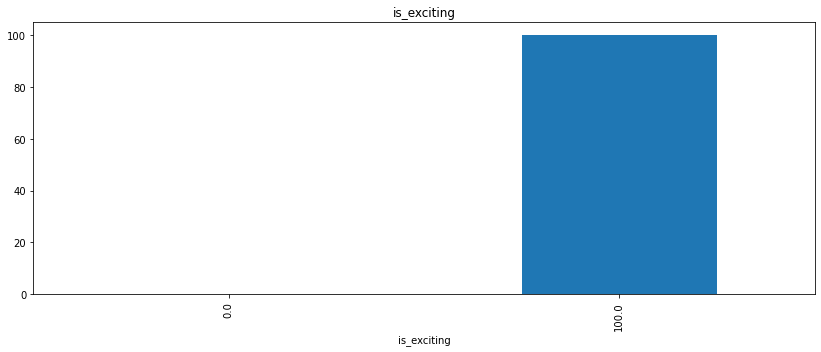

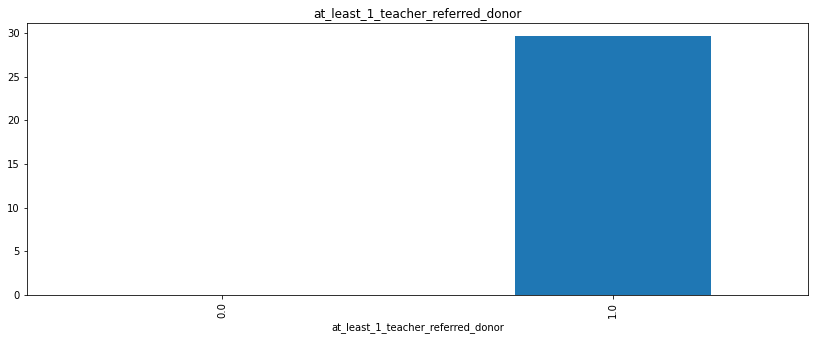

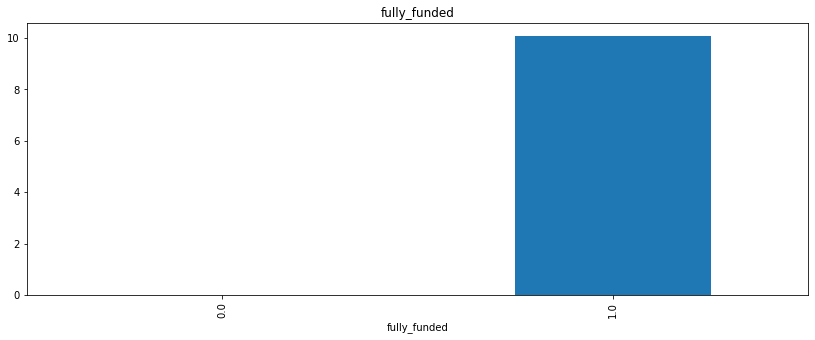

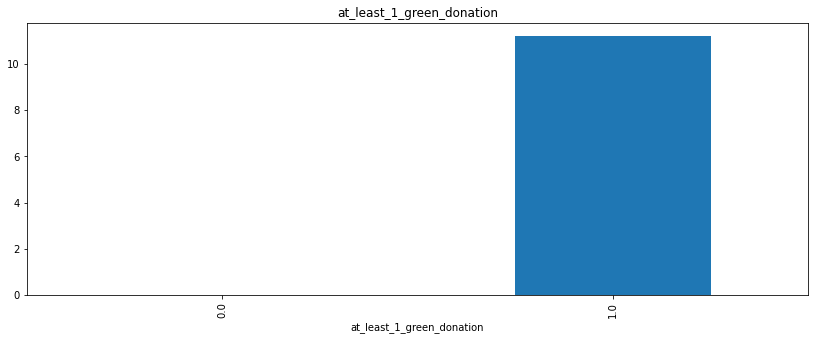

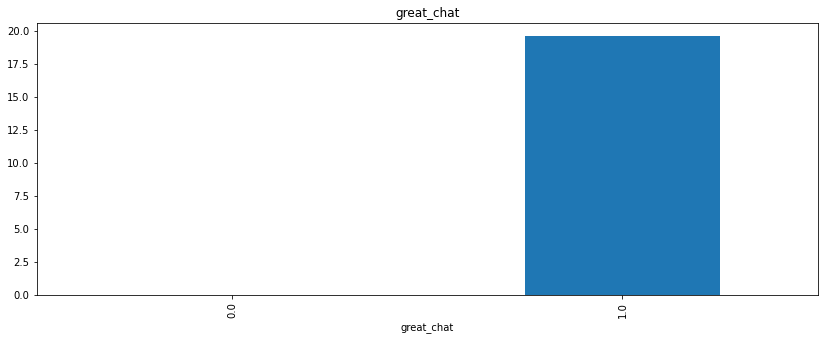

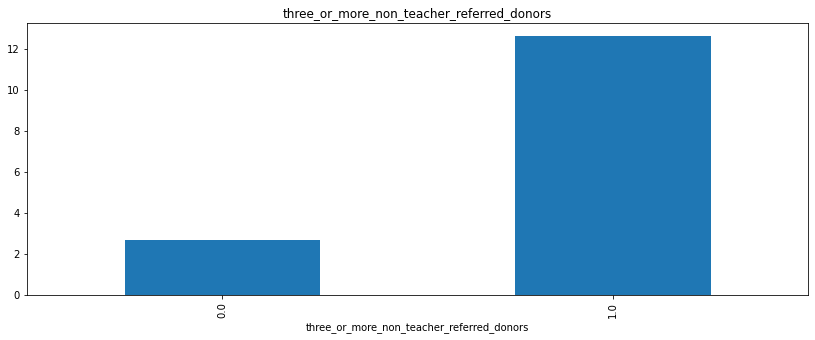

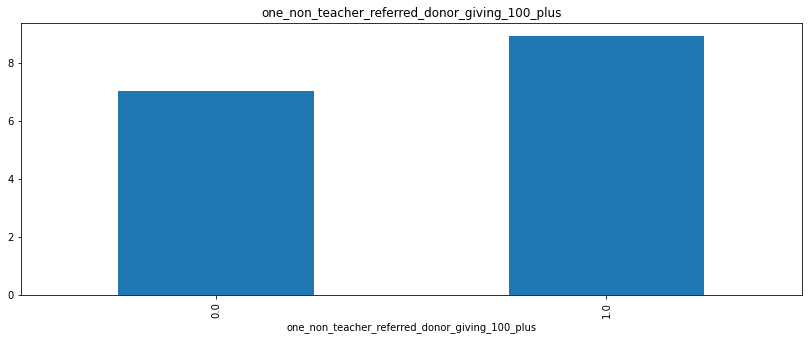

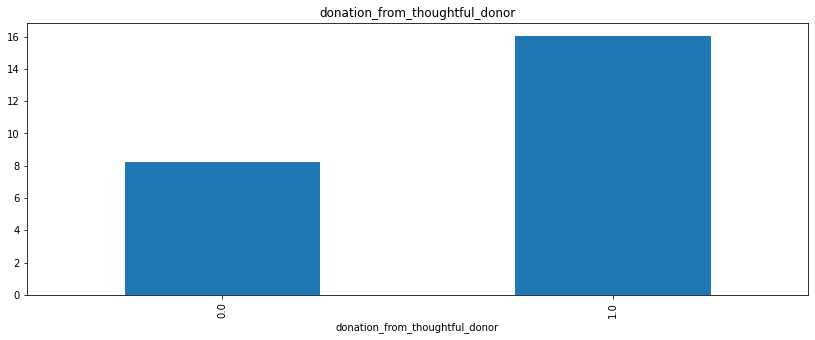

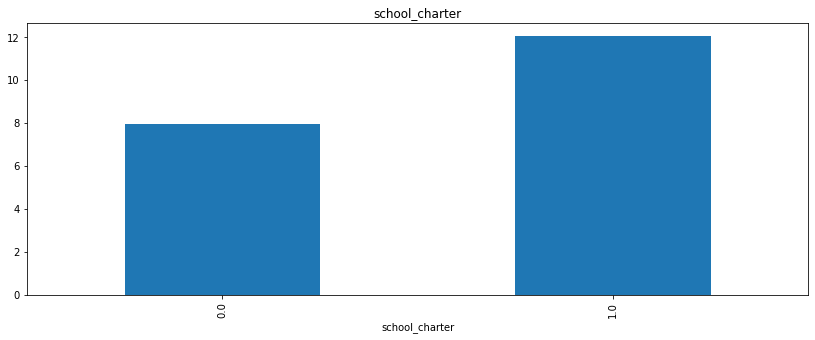

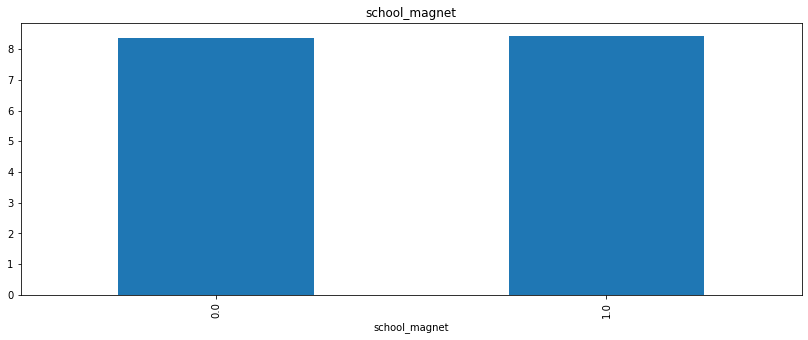

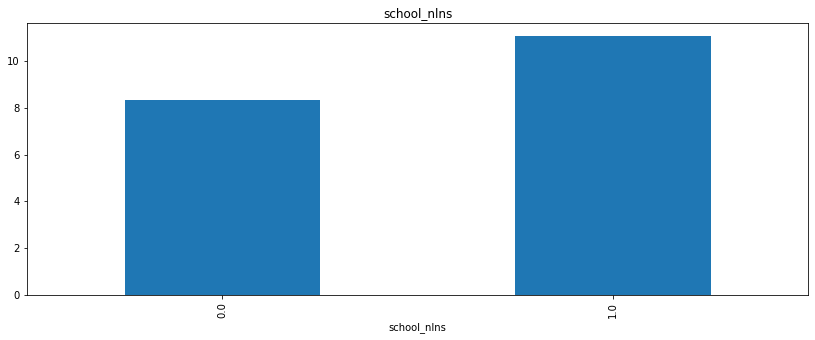

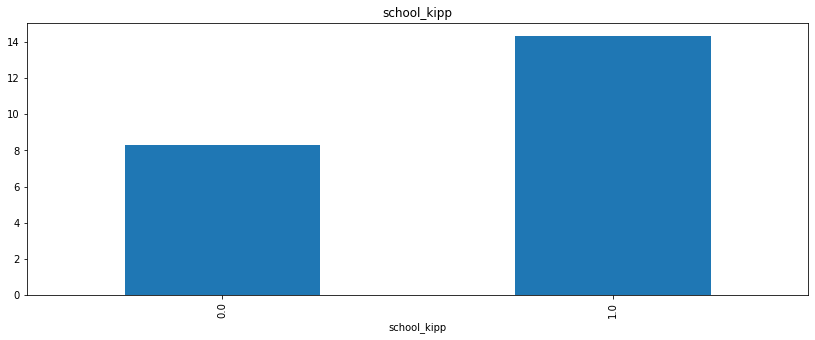

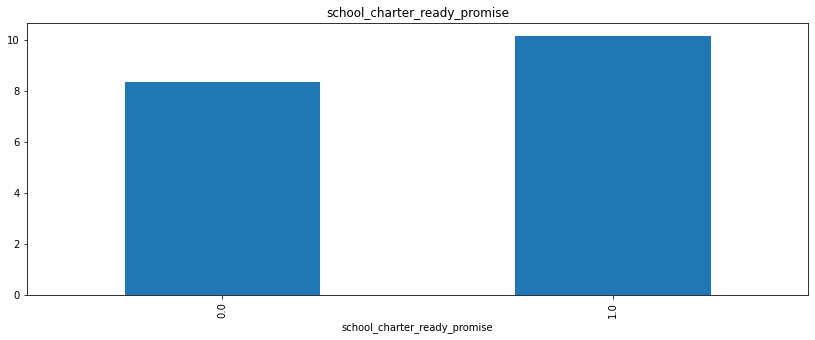

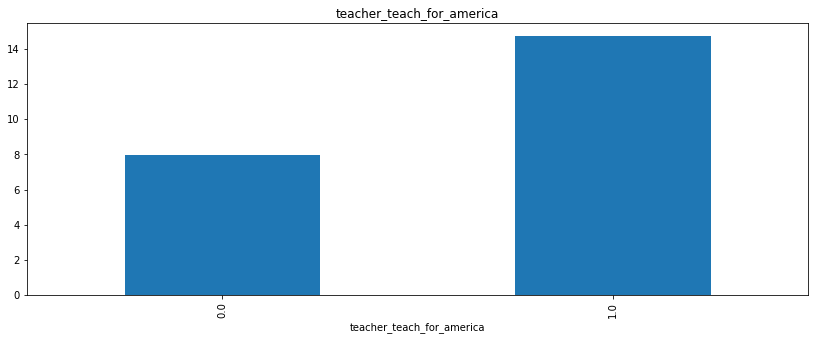

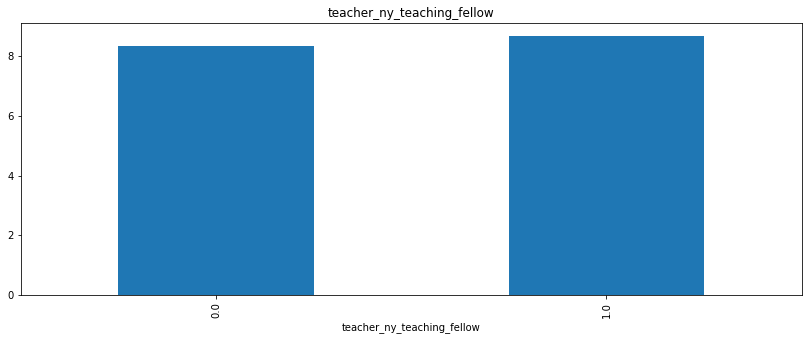

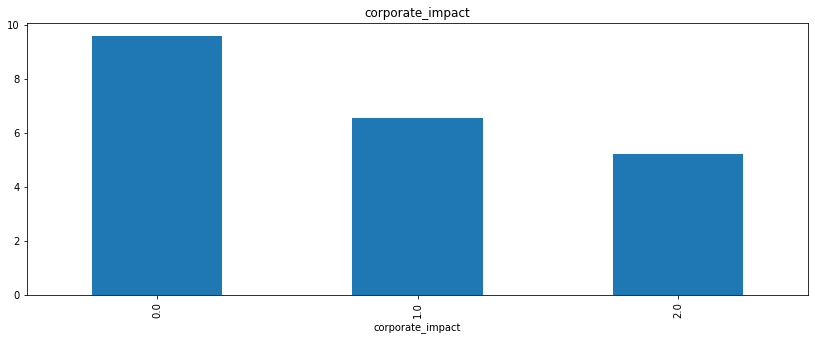

-------------------------------------------------------------- 
 Histogram:


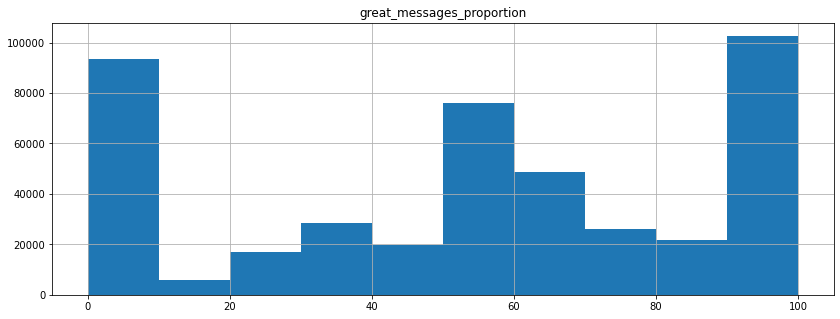

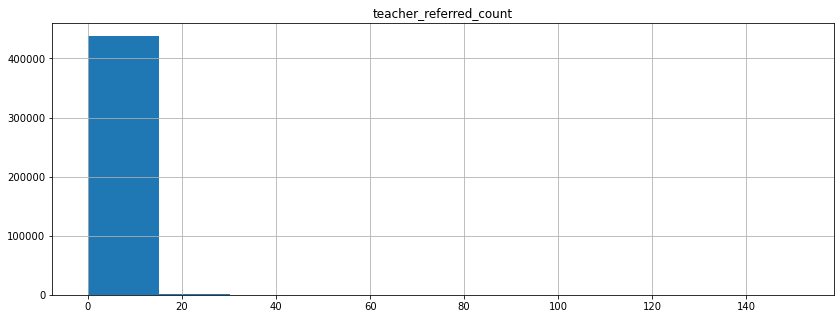

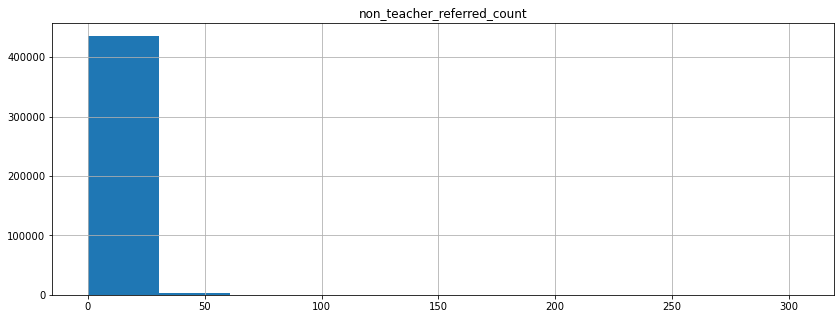

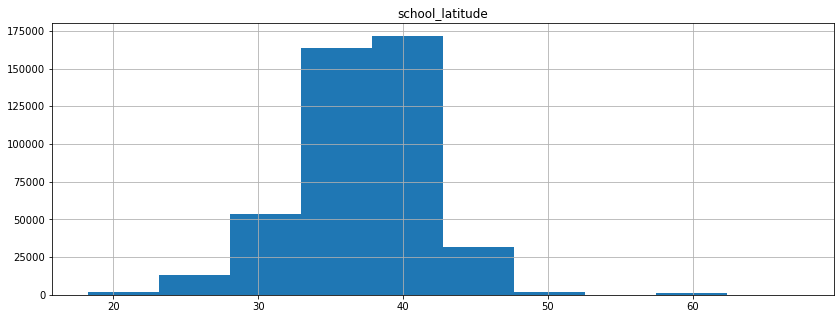

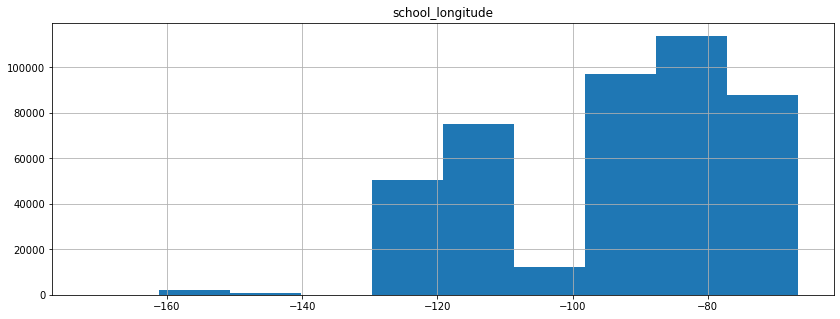

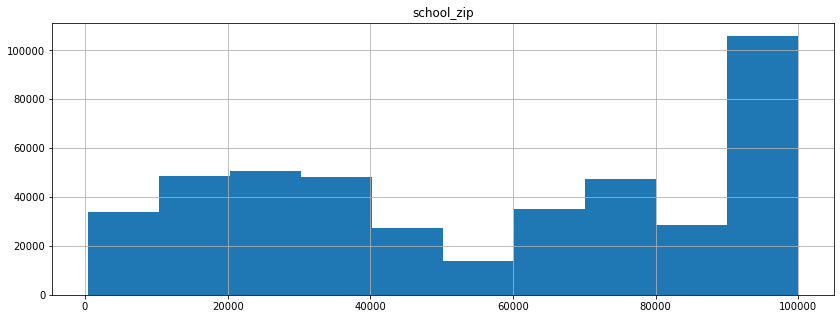

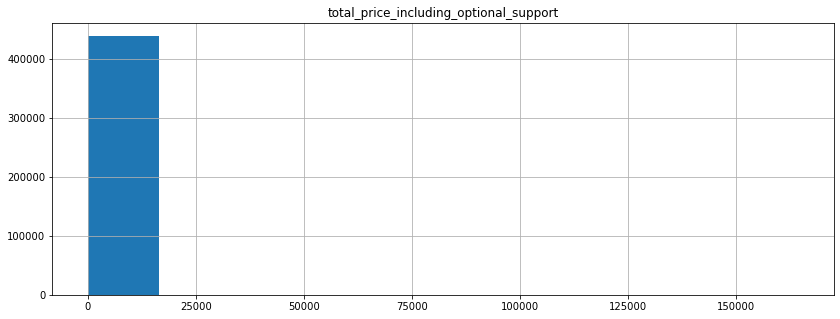

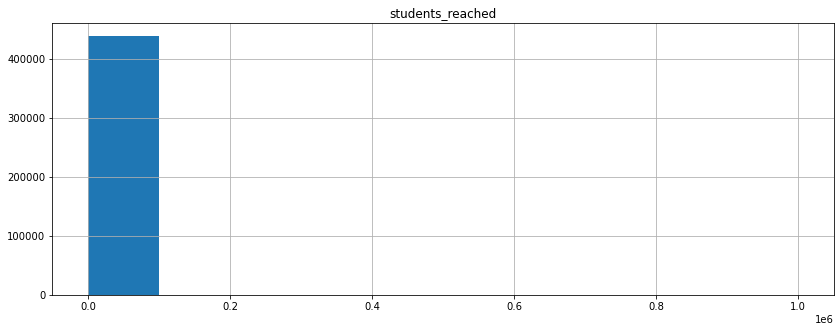

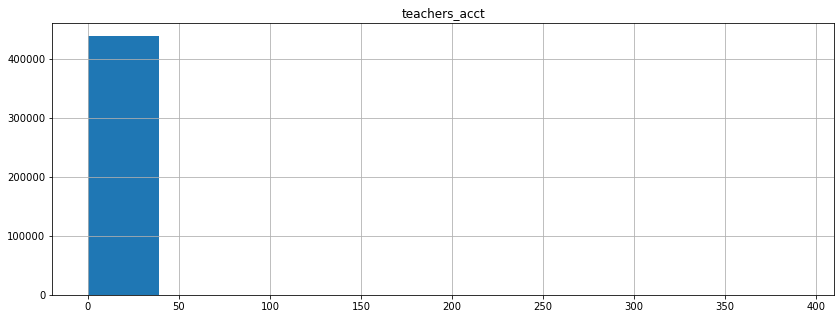

-------------------------------------------------------------- 
 Boxplot:


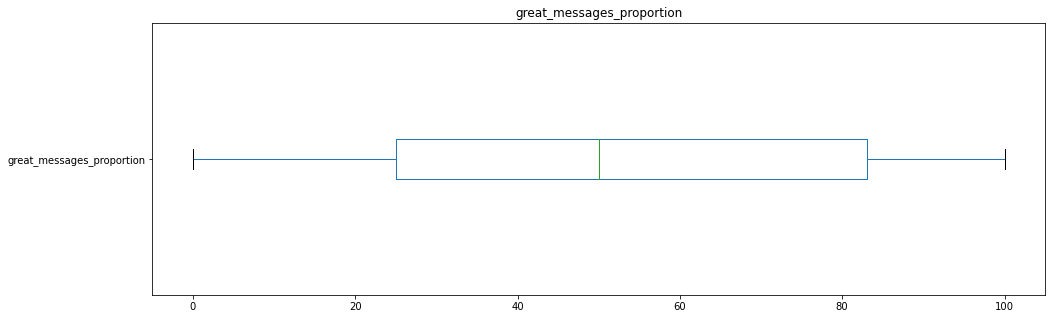

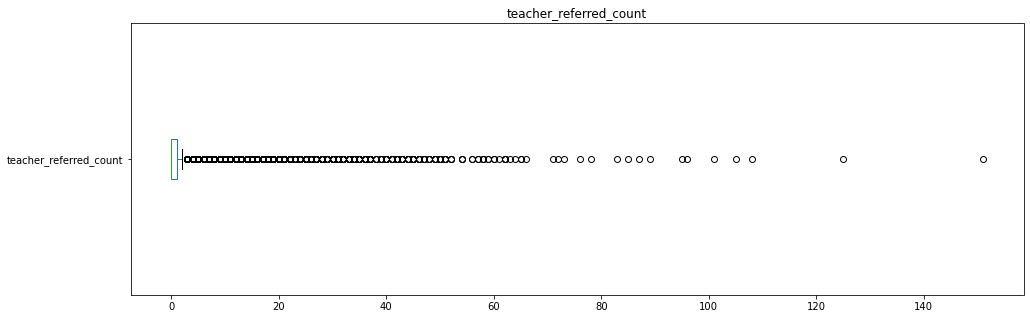

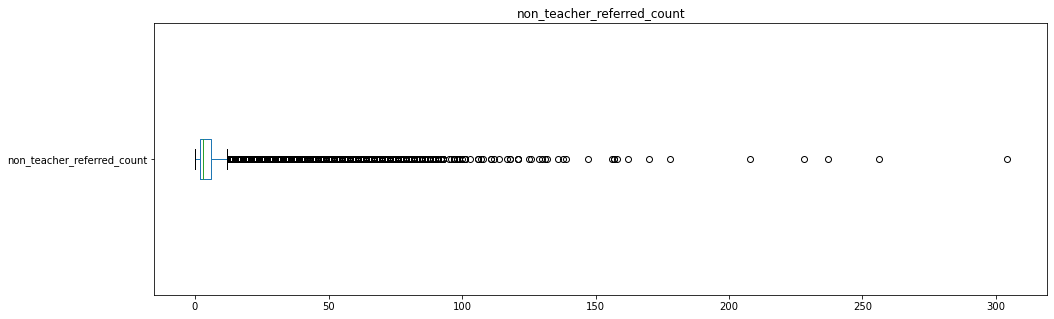

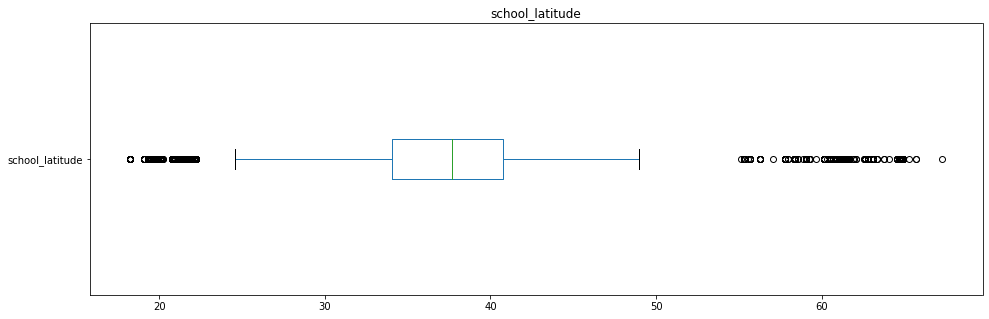

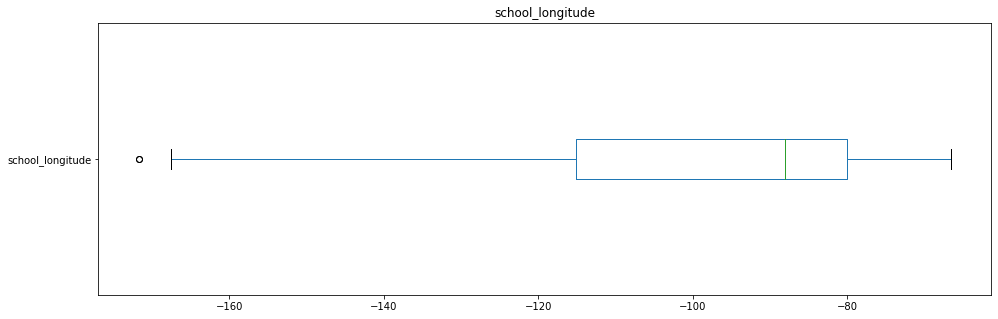

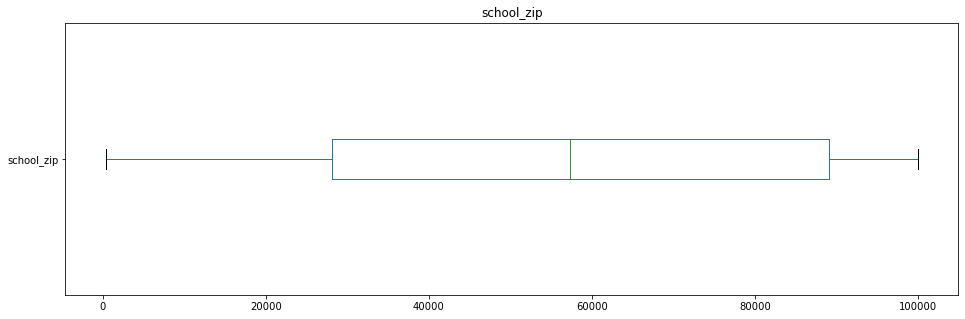

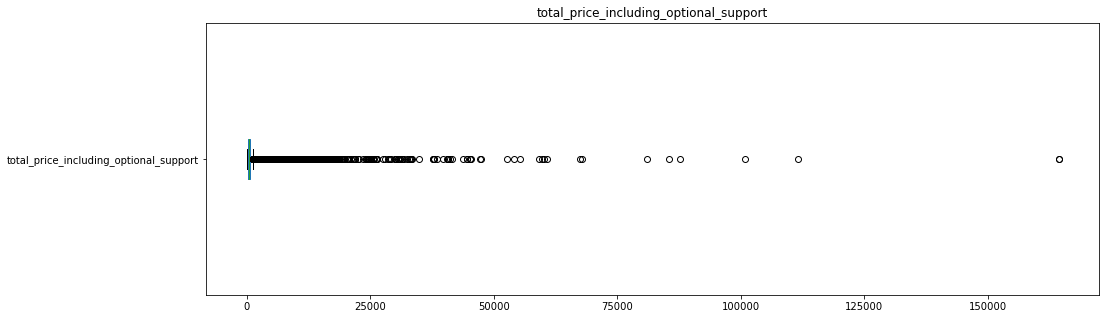

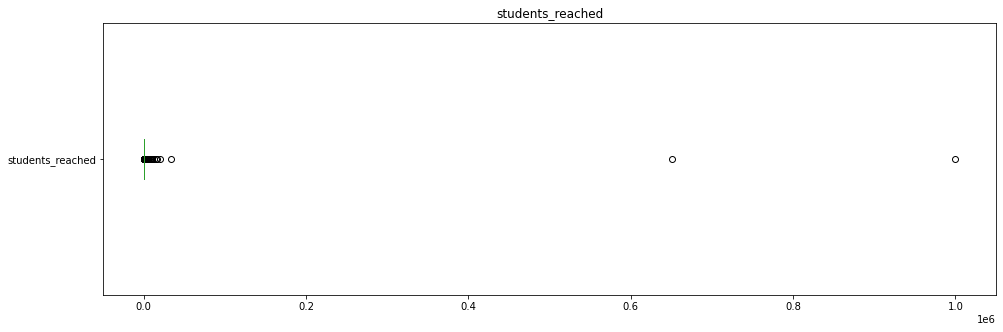

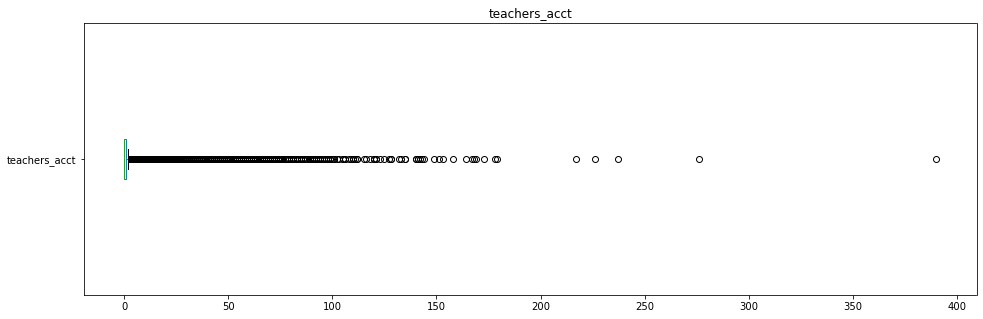

-------------------------------------------------------------- 
 Barplot GroupBy:


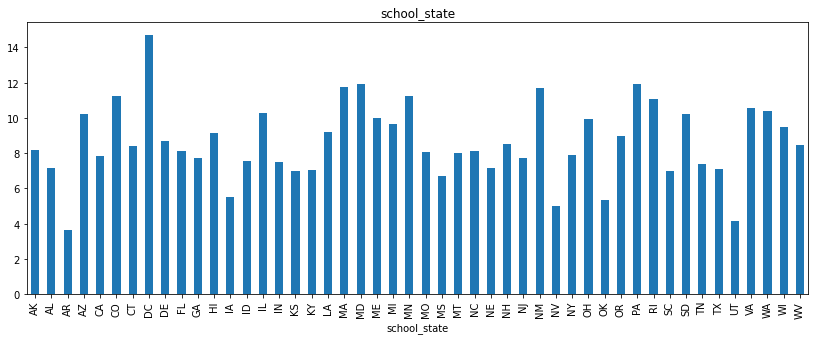

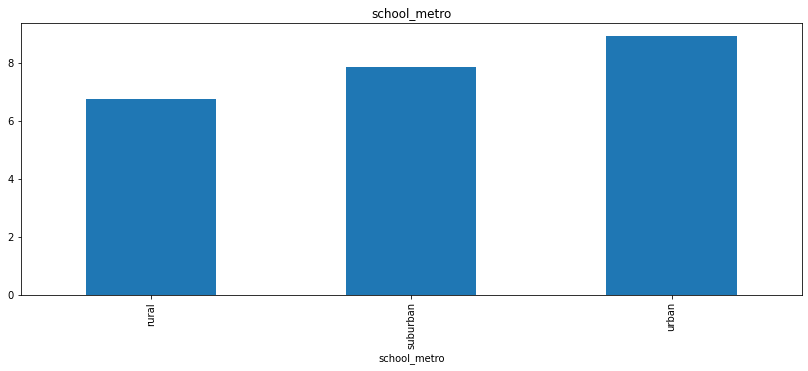

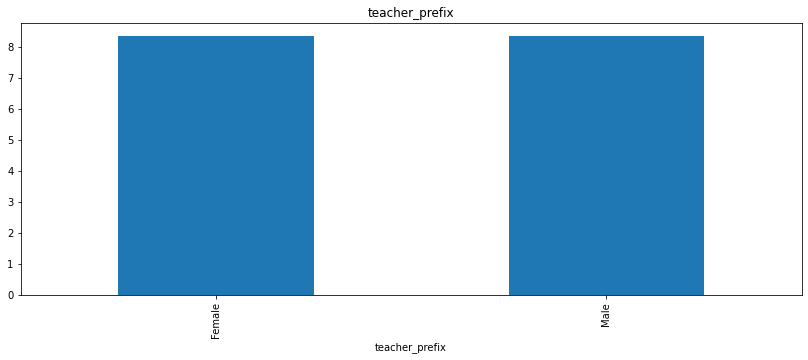

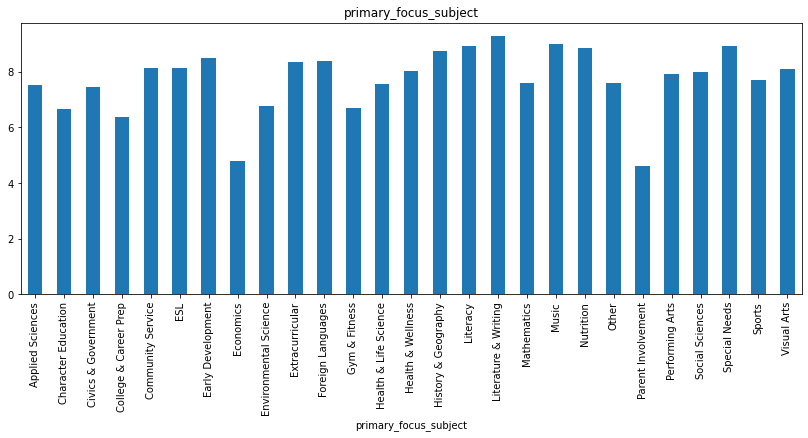

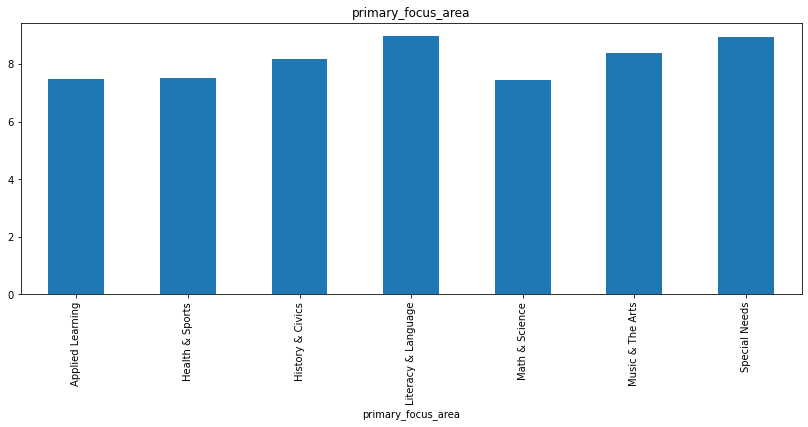

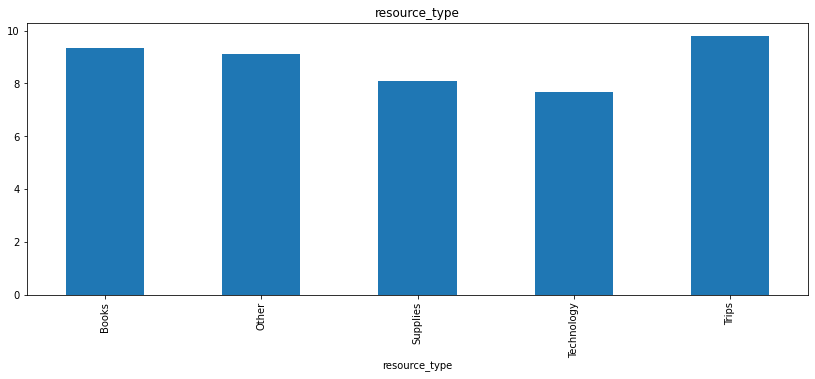

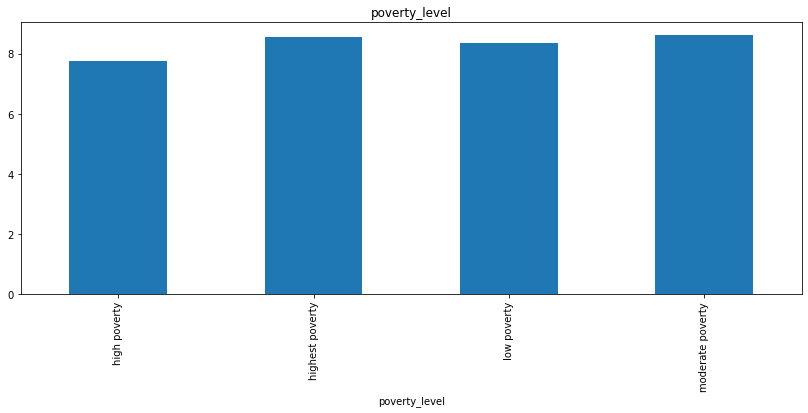

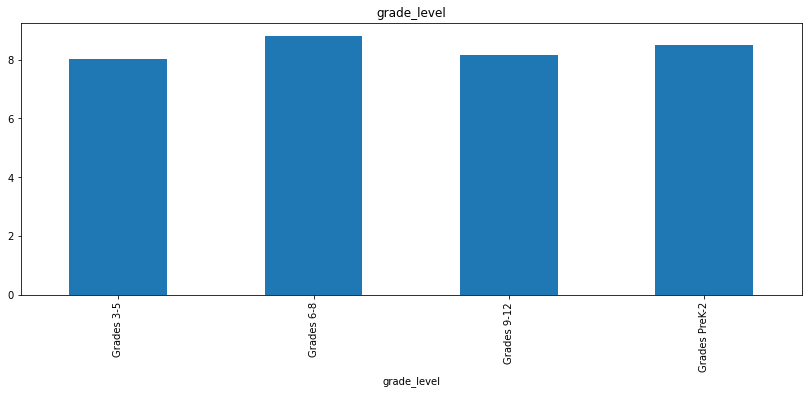

In [50]:
# Let's get some insights from our data along with exploratory analysis. 
# Subsequently, I will load the output to Tableau/PowerBI for reporting.

# features defined 
output = "is_exciting"
numerical_features = [feature for feature in df.columns if df[feature].dtypes != 'O']
year_feature = [feature for feature in numerical_features if 'Yr' in feature or 'year' in feature or 'date' in feature]
discrete_feature=[feature for feature in numerical_features if len(df[feature].unique())<25 and feature not in year_feature]
continuous_feature=[feature for feature in numerical_features if feature not in discrete_feature+year_feature]
categorical_features=[feature for feature in df.columns.drop(['projectid','school_city']) if df[feature].dtypes=='O']
print('Barplot:')
# Numeric-Discrete feature, grouped by, filtered by low-count attributes
dfcopy = df.copy()
for feature in discrete_feature:
    dfcopy['show'] = np.nan
    for i in range(0,df[feature].value_counts(dropna=False).shape[0]):
        if (df[feature].value_counts(dropna=False).iloc[i] >= len(df[feature])*0.001)&(df[feature].value_counts(dropna=False).iloc[i] >= 20):
            dfcopy.at[dfcopy.loc[df[feature] == df[feature].value_counts(dropna=False).index[i]].index,'show'] = dfcopy.loc[df[feature] == df[feature].value_counts(dropna=False).index[i]][feature]
        if i == df[feature].value_counts(dropna=False).shape[0] - 1:
            dfcopy.groupby('show')[output].mean().plot.bar(figsize=(14,5))
            plt.xlabel(feature)
            plt.title(feature)
            plt.show() 
print('--------------------------------------------------------------','\n','Histogram:')
# Numeric-Continious feature, histogram
for feature in continuous_feature:
    df[feature].hist(figsize=(14,5))
    plt.title(feature)
    plt.show()
print('--------------------------------------------------------------','\n','Boxplot:')
# Numeric-Continous feature, boxplot(spotting outliers)
for feature in continuous_feature:
    df[feature].plot(kind='box', vert=False, figsize=(16,5));
    plt.title(feature)
    plt.show()    
print('--------------------------------------------------------------','\n','Barplot GroupBy:')
# Categorical feature, grouped by, filtered by low-count attributes
dfcopy = df.copy()
for feature in categorical_features:
    dfcopy['show'] = np.nan
    for i in range(0,df[feature].value_counts(dropna=False).shape[0]):
        if (df[feature].value_counts(dropna=False).iloc[i] >= len(df[feature])*0.001)&(df[feature].value_counts(dropna=False).iloc[i] >= 20):
            dfcopy.at[dfcopy.loc[df[feature] == df[feature].value_counts(dropna=False).index[i]].index,'show'] = dfcopy.loc[df[feature] == df[feature].value_counts(dropna=False).index[i]][feature]
        if i == df[feature].value_counts(dropna=False).shape[0] - 1:
            dfcopy.groupby('show')[output].mean().plot.bar(figsize=(14,5))
            plt.xlabel(feature)
            plt.title(feature)
            plt.show() 

In [32]:
# Dealing with outliers
# teachers_acct: 

print('for teachers_acct:')
print('Average        :',round(df['teachers_acct'].mean(),1))
print('Median         :',df['teachers_acct'].median())
print('Quantile 9999% :',df['teachers_acct'].quantile(.9999))

df.drop(df.loc[df['teachers_acct'] > df['teachers_acct'].quantile(.9999)].index, inplace=True)
# Students, total price

df.drop(df.loc[df['students_reached'] > df['students_reached'].quantile(.9999)].index, inplace=True)
df.drop(df.loc[df['total_price_including_optional_support'] > df['total_price_including_optional_support'].quantile(.9999)].index, inplace=True)

# Why quantile .9999 has been chosen? I wanted to have a solid common criteria behind dropping, and at the same time not dropping too many.

for teachers_acct:
Average        : 0.8
Median         : 0.0
Quantile 9999% : 110.0


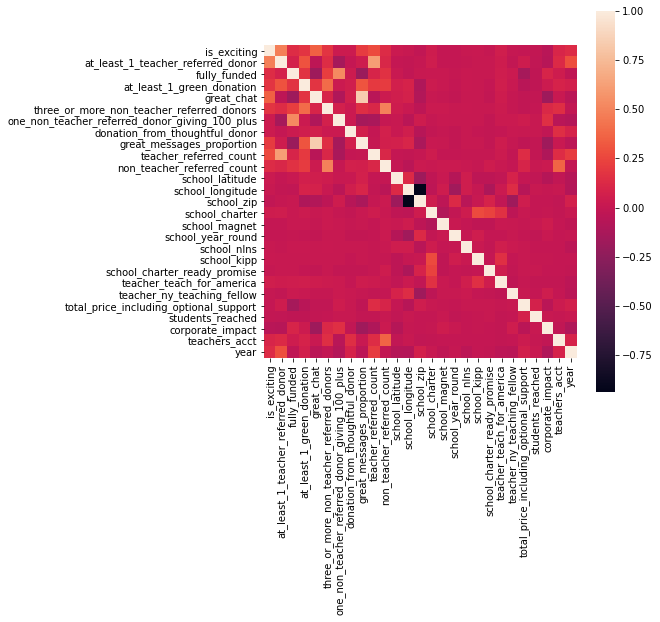

In [35]:
# Correlation shown in heat map. Does it reveal any information? No. 

fig, ax = plt.subplots(figsize=(7,7))
sns.heatmap(df.corr(), vmax=1, square=True);

In [53]:
# Now, let's visualize to see what we can find (Tableau + PowerBI)

df.to_csv('Final.csv', index=None)

In [22]:
df = pd.read_csv('pp.csv')

In [23]:
df

,Exciting,ExcitingNo,NonExciting,NonExcitingNo
0,My,29990,My,29926
1,students,29986,students,29804
2,need,29934,need,29749
3,to,23631,to,24203
4,to,21253,and,20420
5,and,20322,and,19863
6,and,19671,the,19792
7,the,19342,students,19502
8,students,18846,to,18508
9,a,17658,a,17638


In [34]:
for items in df['Exciting'].unique():
    print(items,df.loc[df['Exciting'] == items]['ExcitingNo'].sum())


My 41822
students 51794
need 36483
to 50643
and 45000
the 33850
a 35427
of 28063
in 25432
my 14334
are 14847
is 14033
. 20942
I 12799
that 15518
have 12809
for 21332
their 16594
you 8742
with 14362
our 13101
will 11217
be 10157
they 10780
school 8432
on 9587
books 8252
The 8600
we 6989
it 5754
can 8674
not 5726
them 9577
an 8863
classroom 7386
help 8391
We 5905
at 6146
reading 7632
as 7924
but 4682
this 5526
read 5485
Do 2938
remember 2856
your 2834
all 5097
learn 5916
learning 6337
or 4225
from 5292
do 3963
want 3615
love 3744
when 3566
what 3457
so 6062
about 4701
They 4894
like 4024
would 3549
class 5007
more 4986
able 3779
Our 4977
first 2261
new 5486
by 4193
many 3577
This 3259
use 4974
how 2905
time 2846
grade 2926
book 3144
was 1816
these 3227
Help 3174
teach 2612
Need 1705
\r\n\r\nMy 1703
math 1691
get 2706
make 3876
am 2651
during 1661
copies 1654
one 2666
A 1616
work 3598
Reading 1537
who 2669
2 1509
has 2386
Learning 1447
us 1441
up 2257
materials 1427
only 2374
With 2186
or

In [35]:
for items in df['NonExciting'].unique():
    print(items,df.loc[df['NonExciting'] == items]['NonExcitingNo'].sum())


My 41031
students 52260
need 37191
to 48247
and 45311
the 33503
a 35001
of 27677
in 25084
my 14168
are 14499
I 13358
is 13324
that 15268
. 22143
have 12910
for 20678
will 12569
with 14435
their 15819
be 10710
our 12179
they 10663
you 7173
on 9378
The 8848
can 8376
them 9447
school 7653
we 6654
it 5734
help 8902
not 5558
an 8470
We 6115
books 7460
as 7854
would 4675
classroom 6727
at 5914
reading 6824
this 4872
learning 6354
learn 5745
but 4243
all 4861
able 4710
from 5128
do 3905
read 4625
They 4255
more 4978
or 3919
so 5670
use 5444
like 3467
about 4681
love 3462
Do 2334
class 4579
want 3246
what 3196
remember 2266
your 3079
when 3239
This 3303
by 4208
new 4714
Our 4530
many 3340
these 3462
how 2957
am 3004
make 3958
teach 2969
time 2616
get 2690
math 3108
2 1984
first 1754
grade 2735
work 3433
copies 1641
A 1599
These 2440
children 1581
With 2375
allow 2437
book 2729
technology 2213
Reading 1536
materials 2810
one 2387
Learning 1508
was 1464
\r\n\r\nMy 1444
Help 1439
who 2522
only 22